In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler2=StandardScaler()
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mls_listings_for_alameda_county1.csv')


In [3]:
property_price=np.asanyarray(df['property_price'])
price=[]
for i in property_price:
    i=i.replace(' ','')
    i=i.replace('$','')
    i=i.replace(',','')
    price.append(int(i))


In [4]:
df.insert (0, "Property_price", price)
df.drop('property_price',axis=1)


,Property_price,property_type,property_address,property_details,property_area,property_description,property_mls_info,property_href,location,near_schools,walkscore_url,walkscore
0,355000,Condominium,5840 Benner St #107 Los Angeles CA 90042,1 beds | 1 bath | year built in: 1979,555,Welcome to the gated community of the Arroyo ...,"['MLS # : CREV19278463','MLS Source : CRMLS','...",https://www.mlslistings.com/property/crev19278...,lat=34.106786 | lng=-118.1897912,['Bushnell Way Elementary School Public K-6 0....,https://www.walkscore.com/score/loc/lat=34.106...,83
1,799000,Duplex,10024 S Main St Los Angeles CA 90003,- beds | - bath | year built in: 1938,-,OPPORTUNITY COMES ONLY ONES!! GREAT INVESTMENT...,"['MLS # : CRCV19278308','MLS Source : CRMLS','...",https://www.mlslistings.com/property/crcv19278...,lat=33.9447931 | lng=-118.2737093,['One Hundred Seventh Street Elementary School...,https://www.walkscore.com/score/loc/lat=33.944...,67
2,38888,Land,3781 Richardson Dr. Los Angeles CA,- beds | - bath | year built in: -,-,Vacant Land for sale Only. APN: 5462-010-029 B...,"['MLS # : CRTR19277741','MLS Source : CRMLS','...",https://www.mlslistings.com/property/crtr19277...,lat=34.1120533 | lng=-118.225833,['Toland Way Elementary School Public K-6 0.76...,https://www.walkscore.com/score/loc/lat=34.112...,23
3,1149000,Duplex,923 N Heliotrope Dr Los Angeles CA 90029,- beds | - bath | year built in: 1921,-,Come and see this fantastic detached duplex si...,"['MLS # : CRPW19279205','MLS Source : CRMLS','...",https://www.mlslistings.com/property/crpw19279...,lat=34.0887331 | lng=-118.2953018,['Ramona Elementary School Public K-6 0.31 mi ...,https://www.walkscore.com/score/loc/lat=34.088...,90
4,509900,Single Family Residence,1744 W 65th St Los Angeles CA 90047,4 beds | 2 bath | year built in: 1937,"1,239",**NICE TRADITIONAL STARTER HOME WITH 4 BEDROOM...,"['MLS # : CRDW19274859','MLS Source : CRMLS','...",https://www.mlslistings.com/property/crdw19274...,lat=33.980383 | lng=-118.3083167,['Horace Mann Ucla Community Public K-12 0.35 ...,https://www.walkscore.com/score/loc/lat=33.980...,67
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,3495000,Single Family Residence,136 Hazel Ln Piedmont CA 94611,5 beds | 4 bath | year built in: 1937,"4,059",Perfectly located in the center of town on a q...,"['MLS # : EB40893170','MLS Source : MAXEBRDI',...",https://www.mlslistings.com/property/eb4089317...,lat=37.695019 | lng=-121.891894,['Cleveland Elementary School Public K-5 0.34 ...,https://www.walkscore.com/score/loc/lat=37.704...,50
2022,689000,Townhouse,40 Heritage Oakland CA 94605,3 beds | 2/1 bath | year built in: 1977,"1,757",Perched in the Oakland hills but with easy acc...,"['MLS # : MR40893175','MLS Source : MAXEBRDI',...",https://www.mlslistings.com/property/mr4089317...,lat=37.822242 | lng=-122.2321073,['Martin Luther King Jr. Elementary School Pub...,https://www.walkscore.com/score/loc/lat=37.533...,55
2023,759000,Single Family Residence,871 53rd St Oakland CA 94608,3 beds | 1 bath | year built in: 1908,"1,231",This Charming turn of the century Craftsman is...,"['MLS # : EB40893230','MLS Source : MAXEBRDI',...",https://www.mlslistings.com/property/eb4089323...,lat=37.766165 | lng=-122.129067,['Leo R. Croce Elementary School Public PK-5 1...,https://www.walkscore.com/score/loc/lat=37.657...,4
2024,1265000,Single Family Residence,4305 Sedge St Fremont CA 94555,4 beds | 2 bath | year built in: 1979,"1,871",Beautiful one level renovated home in the very...,"['MLS # : BE40893240','MLS Source : MAXEBRDI',...",https://www.mlslistings.com/property/be4089324...,lat=37.766165 | lng=-122.129067,['Emma C. Smith Elementary School Public K-5 1...,https://www.walkscore.com/score/loc/lat=37.521...,86


In [5]:
valid_df=df[df['property_area']!='-']
del valid_df['property_price']
valid_df= valid_df.reset_index(drop=True)

In [6]:
info={'MLS' : [],
 'Days' : [],
 'Bedrooms' : [],
 'Bathrooms' : [],
 'Kitchen' : [],
 'Dining' : [],
 'Family' : [],
 'Fireplace' : [],
 'Flooring' : [],
 'Laundry' : [],
 'Cooling' : [],
 'Heating' : [],
 'Roof' : [],
 'Foundation' : [],
 'Pool' : [],
 'Style' : [],
 'Horse' : [],
 'Garage/Parking' : [],
 'Elementary' : [],
 'High' : [],
 'Unit' : [],
 'Sewer' : [],
 'Water' : [],
 'HOA' : [],
 'Complex' : [],
 'Zoning' :[]}

In [7]:
a=np.asanyarray(valid_df['property_mls_info'])
ss=set()
for key in info.keys(): 
    ss.add(key) 
mls=[]
compare=set()
for i in a:
    for j in i .split(','):
        
        if 'MLS #' not in str(j):
            if '[' in str(j):
                j=j.replace('[','')
            if ']' in j:
                j=j.replace(']','')
            check=j.split()[0].lstrip("'").strip(':')
            
            #compare.add(check)
            
            if check in info:
                info[check].append(j.split(':', 1)[1].replace("'",''))

        else:
            mls.append(j.split(':', 1)[1].replace("'",''))
    
    #not_in_info=ss-compare
    
    #for some in not_in_info:
        #info[some].append('NaN')
    
    #compare.clear()

In [8]:
columns_id=['MLS_ID']
for i in info.keys():
    columns_id.append(str(i))

info['MLS_ID']=mls

In [9]:
some_df=pd.DataFrame(info,columns=columns_id)

In [10]:
last=valid_df.join(some_df)
last['property_area'] = last['property_area'].apply(lambda x: int(x.replace(',','')))
details= last['property_details'].apply(lambda x: x.replace('year built in: ','').replace('beds','').replace('bath','').replace(' ','').split('|'))

In [11]:
bed=[]
bath=[]
year=[]
for i in details:
    count=0
    for count,j in enumerate(i,0):
        if count==0:
            try:
                bed.append(int(j))
            except:
                bed.append(j)
        if count==1:
            
            try:
                bath.append(int(j.split('/', 1)[0]))
            except:
                bath.append(j.split('/', 1)[0])
        if count==2:
            try:
                year.append(int(j))
            except:
                year.append(j)

In [12]:
last.insert (2, "bed", bed)
last.insert (3, "bath", bath)
last.insert (4, "year", year)
last=last[last['bed']!='-']
last= last.reset_index(drop=True)

In [13]:
'''from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
# define example
values= np.asanyarray(last['property_type'])

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('The integer encoding is :',integer_encoded,'\n')
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('The one hot encoding is ','\n',onehot_encoded)
# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)'''

"from sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\nfrom numpy import argmax\n# define example\nvalues= np.asanyarray(last['property_type'])\n\n# integer encode\nlabel_encoder = LabelEncoder()\ninteger_encoded = label_encoder.fit_transform(values)\nprint('The integer encoding is :',integer_encoded,'\n')\n# binary encode\nonehot_encoder = OneHotEncoder(sparse=False)\ninteger_encoded = integer_encoded.reshape(len(integer_encoded), 1)\nonehot_encoded = onehot_encoder.fit_transform(integer_encoded)\nprint('The one hot encoding is ','\n',onehot_encoded)\n# invert first example\n#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])\n#print(inverted)"

In [14]:
dummies = pd.get_dummies(last["property_type"])
last=last.drop('property_details',axis=1)
last=last.drop('property_mls_info',axis=1)
last=last.drop('property_type',axis=1)
last=last.drop('Unit',axis=1)

In [15]:
last['HOA'] = last['HOA'].apply(lambda x: int(x.replace('$','').replace('-','-1')))
last['Sewer'] = last['Sewer'].apply(lambda x: str(x.replace(' P','P').replace(' -','-1').replace(' N','N')))
last['walkscore'] = last['walkscore'].apply(lambda x: int(x.replace('None','-1')))
last['Water'] = last['Water'].apply(lambda x: str(x.replace(' P','P').replace(' -','-1').replace(' O','O')))


In [16]:
for i,j in zip( range( len(dummies.columns)) , dummies.columns):
    if 'Single' not in j:
        last.insert(i+1  , str(j) ,  np.asanyarray(dummies[j]))
    else:
        last.insert(i+1  , 'Single_Family_Residence' ,  np.asanyarray(dummies[j]))

In [17]:
last['bed'] = pd.to_numeric(last['bed'])
last['bath'] = pd.to_numeric(last['bath'])

In [18]:
max_prop_value=last['Property_price'].max()
min_prop_value=last['Property_price'].min()
max_bed_bath=11
max_area=last['property_area'].max()
max_year=last['year'].max()
min_year=last['year'].min()
best_hoa=0
bad_hoa=last['HOA'].max()

property_score=[]
hoa_score=0
sewer_score=0
water_score=0
walkscore_score=0


for i in range(len(last)):
    property_value_score=(10-(last.iloc[i]['Property_price']-min_prop_value)/(max_prop_value-min_prop_value)*10)+20
    bed_bath_score=((last.iloc[i]['bed']+last.iloc[i]['bath'])/max_bed_bath)*10
    area_score=((last.iloc[i]['property_area']/max_area)*10)+5
    year_built_score=((last.iloc[i]['year']-min_year)/(max_year-min_year)*5)+5
    hoa=1
    if hoa==1:
        if last.iloc[i]['HOA']==-1:
            hoa_score=1
        else:
            (1000-(last.iloc[i]['HOA']-bad_hoa/bad_hoa-best_hoa))/200
        
        
    sew=1
    if sew==1:
        if last.iloc[i]['Sewer'] =='None':
            sewer_score=1
        elif last.iloc[i]['Sewer'] =='-1':
            sewer_score=2
        else:
            sewer_score=4
    
    wat=1
    if wat==1:
        if last.iloc[i]['Water'] =='None':
            water_score=1
        elif last.iloc[i]['Water'] =='-1':
            water_score=2
        else:
            water_score=4
    
    walk=1
    if walk==1:
        if last.iloc[i]['walkscore']==-1:
            walkscore_score=5
        else:
            walkscore_score=last.iloc[i]['walkscore']/6
    
    total_score=property_value_score+bed_bath_score+area_score+year_built_score+hoa_score+sewer_score+water_score+walkscore_score
    property_score.append(total_score)
last['property_score']=property_score

In [78]:
last

,Property_price,Condominium,Residential,Single_Family_Residence,Townhouse,bed,bath,year,property_address,property_area,...,Style,Horse,Garage/Parking,Elementary,High,Sewer,Water,HOA,Complex,Zoning
0,355000,1,0,0,0,1,1,1979,5840 Benner St #107 Los Angeles CA 90042,555,...,Contemporary,-,Assigned Spaces Carport Garage: 0 Car(s),Los Angeles Unified,Los Angeles Unified,-1,-1,320,Barbecue Area Community Pool Picnic Area Play...,LARD1.5
1,509900,0,0,1,0,4,2,1937,1744 W 65th St Los Angeles CA 90047,1239,...,-,-,Garage: 1 Car(s),Los Angeles Unified,Los Angeles Unified,-1,-1,0,-,LAR1
2,525000,0,0,1,0,2,1,1936,600 W 102nd St Los Angeles CA 90044,1120,...,-,-,Garage Gate/Door Opener Other Garage: 1 Car(s),Los Angeles Unified,Los Angeles Unified,-1,-1,0,-,LAR1
3,779000,1,0,0,0,2,2,1964,540 Kelton Ave #401 Los Angeles CA 90024,1191,...,-,-,Assigned Spaces Other Parking Area Parking Re...,Los Angeles Unified,Los Angeles Unified,-1,-1,636,Additional Storage Community Pool,LAR4
4,1000000,0,0,1,0,3,3,1946,316 San Pascual Ave Los Angeles CA 90042,2123,...,-,-,Garage: 2 Car(s),Los Angeles Unified,Los Angeles Unified,-1,-1,0,-,LARD2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,3495000,0,0,1,0,5,4,1937,136 Hazel Ln Piedmont CA 94611,4059,...,Tudor,-,Access - Interior Attached Garage Garage Gara...,Piedmont City Unified,Piedmont City Unified,Public Sewer,Public,-1,-,-
1171,689000,0,0,0,1,3,2,1977,40 Heritage Oakland CA 94605,1757,...,Contemporary,-,Access - Interior Attached Garage Garage Gate...,Oakland Unified,Oakland Unified,Public Sewer,Public,455,Club House Community Pool Garden / Greenbelt/...,-
1172,759000,0,0,1,0,3,1,1908,871 53rd St Oakland CA 94608,1231,...,Craftsman,-,No Garage Off-Street Parking Garage: 0 Car(s),-,-,-1,Public,-1,-,-
1173,1265000,0,0,1,0,4,2,1979,4305 Sedge St Fremont CA 94555,1871,...,Contemporary,-,Attached Garage Garage Gate/Door Opener Garag...,-,-,Public Sewer,Public,-1,-,-


In [27]:
last[(last['HOA']!=0) & (last['HOA']!=-1)]

,Property_price,Condominium,Residential,Single_Family_Residence,Townhouse,bed,bath,year,property_address,property_area,...,Horse,Garage/Parking,Elementary,High,Sewer,Water,HOA,Complex,Zoning,property_score
0,355000,1,0,0,0,1,1,1979,5840 Benner St #107 Los Angeles CA 90042,555,...,-,Assigned Spaces Carport Garage: 0 Car(s),Los Angeles Unified,Los Angeles Unified,-1,-1,320,Barbecue Area Community Pool Picnic Area Play...,LARD1.5,63.639740
3,779000,1,0,0,0,2,2,1964,540 Kelton Ave #401 Los Angeles CA 90024,1191,...,-,Assigned Spaces Other Parking Area Parking Re...,Los Angeles Unified,Los Angeles Unified,-1,-1,636,Additional Storage Community Pool,LAR4,60.672096
5,668000,1,0,0,0,2,2,1997,6922 Knowlton Pl #204 Los Angeles CA 90045,1154,...,-,Garage: 2 Car(s),Los Angeles Unified,Los Angeles Unified,None,-1,400,Gym / Exercise Facility,LAR3,63.908993
12,379000,1,0,0,0,1,2,1979,322 N Avenue 66 #4 Los Angeles CA 90042,918,...,-,Garage: 1 Car(s),-,-,-1,-1,230,Other,LARD2,63.976564
16,355000,1,0,0,0,1,1,1979,5840 Benner St #107 Los Angeles CA 90042,555,...,-,Assigned Spaces Carport Garage: 0 Car(s),Los Angeles Unified,Los Angeles Unified,-1,-1,320,Barbecue Area Community Pool Picnic Area Play...,LARD1.5,63.639740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1728888,0,0,1,0,5,4,2000,11030 Inspiration Cir Dublin CA 94568,4082,...,-,Attached Garage Garage Garage: 3 Car(s),Dublin Unified,Dublin Unified,Public Sewer,Public,78,Garden / Greenbelt/ Trails,-,72.772925
1167,2200000,0,0,1,0,5,4,2007,916 Mingoia St Pleasanton CA 94566,3892,...,-,Attached Garage Garage Gate/Door Opener Off-S...,Pleasanton Unified,Pleasanton Unified,Public Sewer,Public,92,Other,-,67.479694
1169,825000,0,0,0,1,3,2,1997,4164 Veneto Ct Pleasanton CA 94588,1503,...,-,Attached Garage Garage Gate/Door Opener Garag...,Pleasanton Unified,Pleasanton Unified,Public Sewer,Public,232,Community Pool Garden / Greenbelt/ Trails Pla...,-,71.636139
1171,689000,0,0,0,1,3,2,1977,40 Heritage Oakland CA 94605,1757,...,-,Access - Interior Attached Garage Garage Gate...,Oakland Unified,Oakland Unified,Public Sewer,Public,455,Club House Community Pool Garden / Greenbelt/...,-,67.219140


# Exploratory data analysis

In [18]:
eda_df=last[['Property_price','bed','bath','property_area']]

In [42]:
'''
clusters = 4
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(eda_df) 
print(kmeans.labels_)'''

'\nclusters = 4\n  \nkmeans = KMeans(n_clusters = clusters) \nkmeans.fit(eda_df) \nprint(kmeans.labels_)'

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

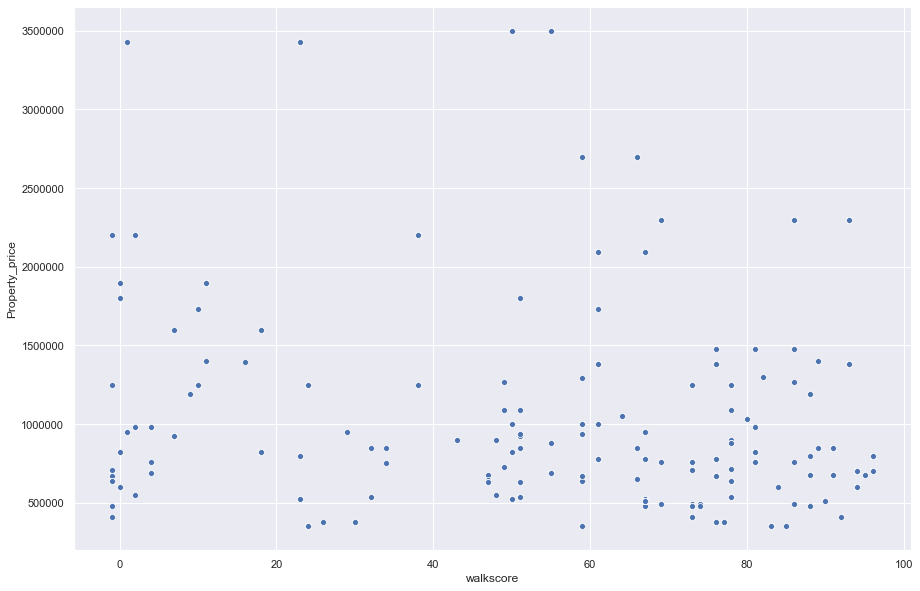

In [135]:
sns.scatterplot(last['pro'],eda_df['Property_price'])

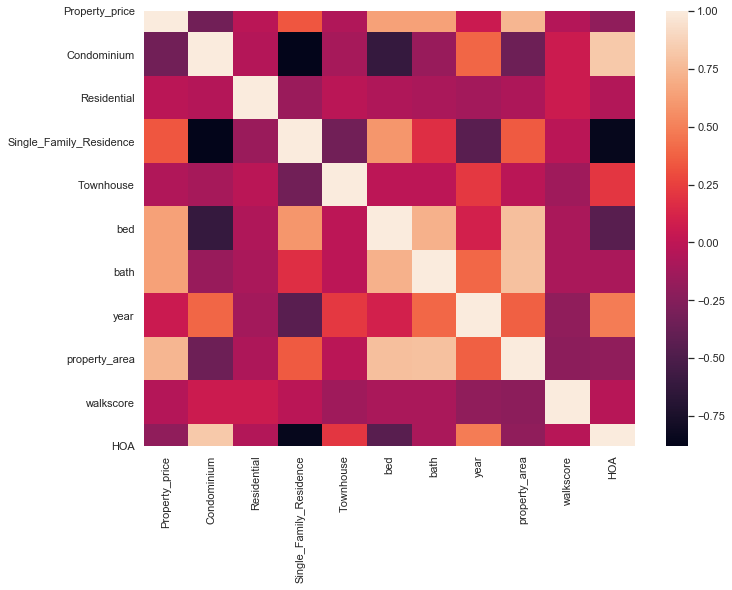

In [64]:
sns.heatmap(last.corr())

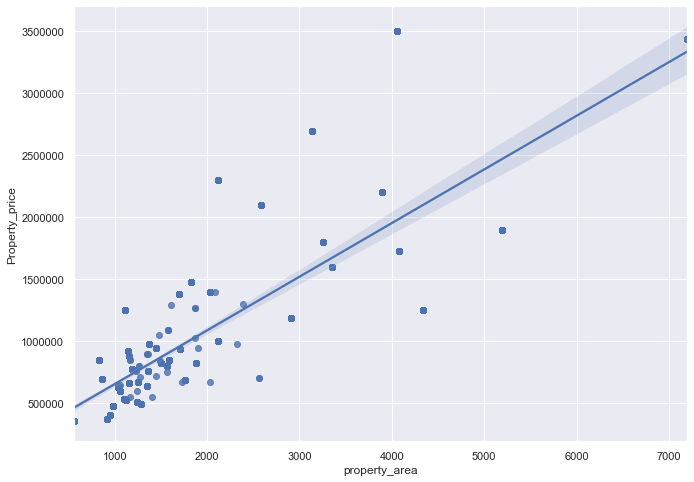

In [71]:
sns.regplot(last['property_area'],last['Property_price'])

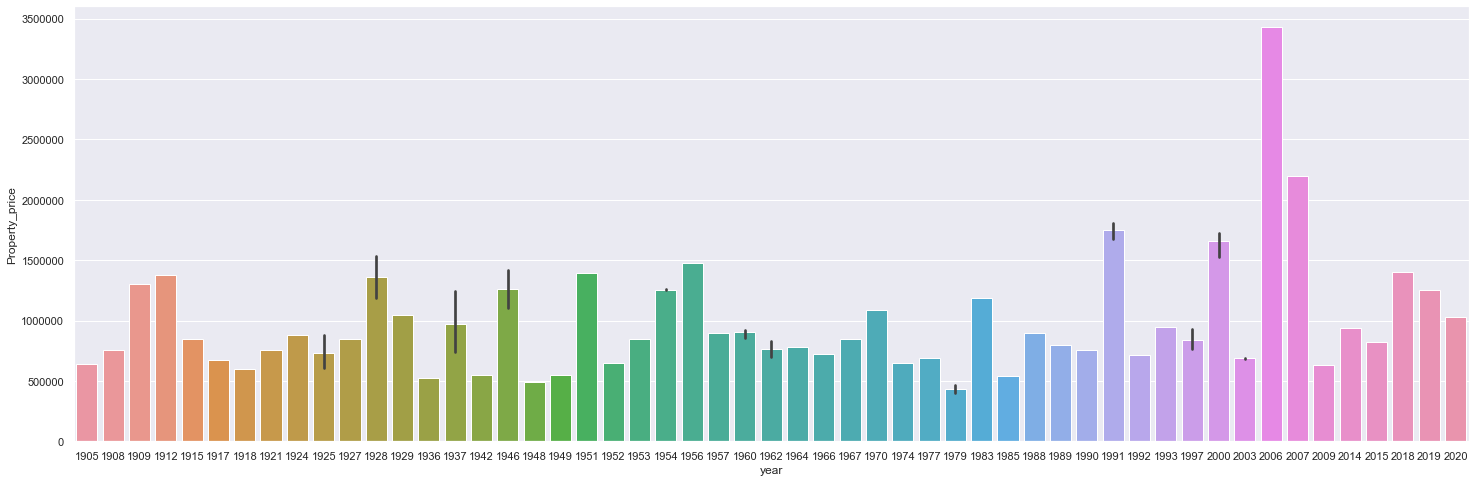

In [86]:
sns.set(rc={'figure.figsize':(25,8)})
sns.barplot(last['year'],last['Property_price'])

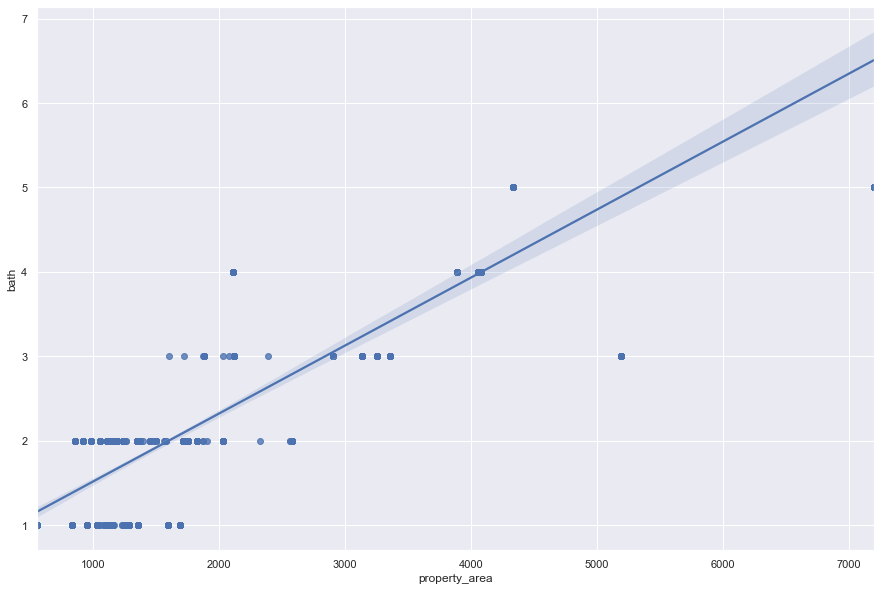

In [148]:
sns.regplot(last['property_area'],last['bath'])

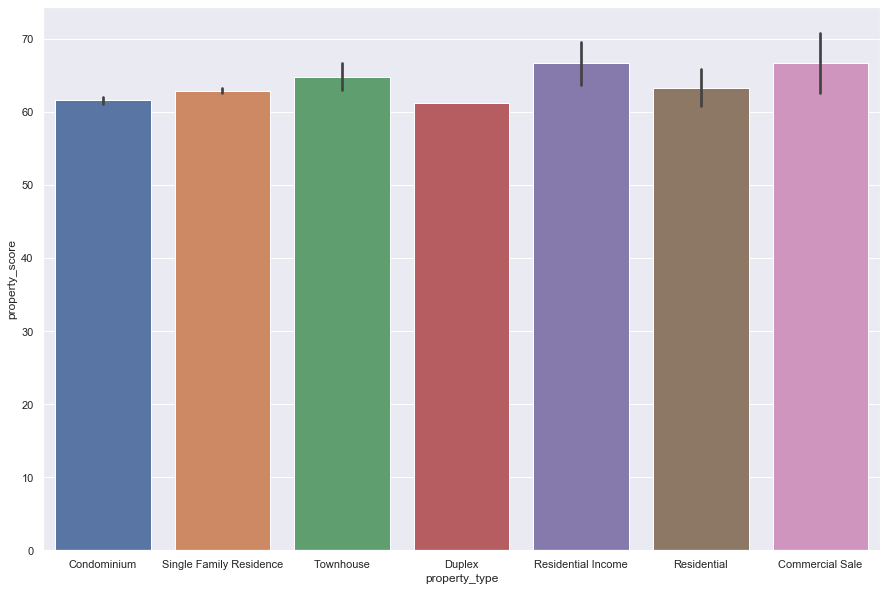

In [155]:
sns.barplot(valid_df['property_type'],last['property_score'])

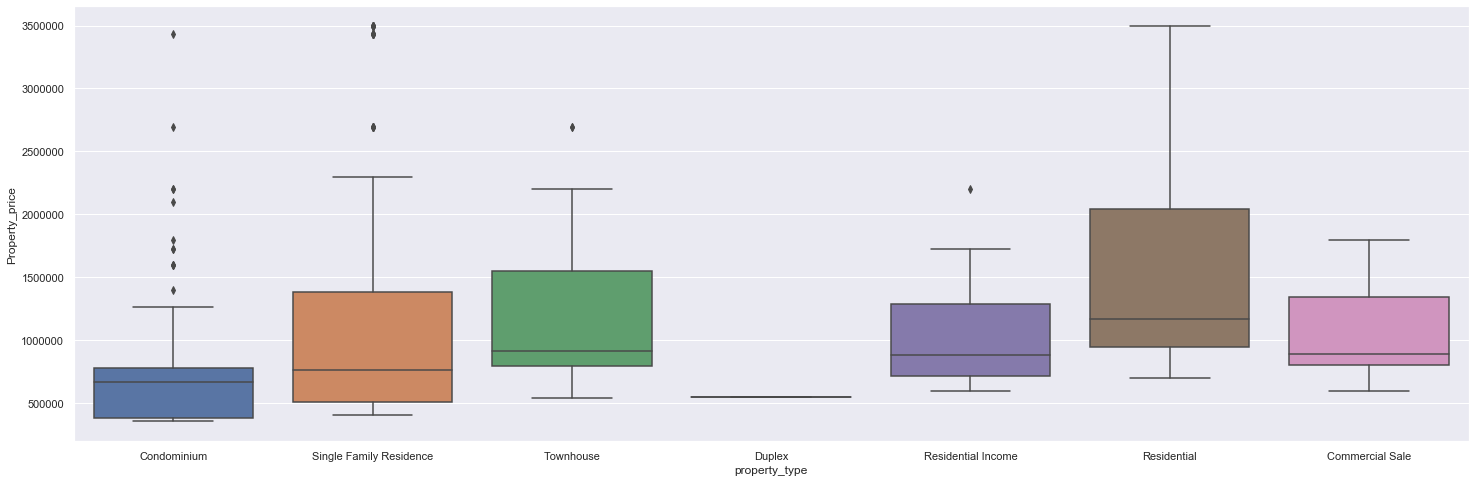

In [100]:
sns.boxplot(valid_df['property_type'],last['Property_price'])

In [44]:
'''columns=['Property_price','bed','bath','property_area']
from sklearn.decomposition import IncrementalPCA
X = eda_df
ipca = IncrementalPCA(n_components=4)
ipca.fit(X)
IncrementalPCA(copy=True, n_components=4, whiten=False)
ipca_df=pd.DataFrame(ipca.transform(X),columns=columns)'''

"columns=['Property_price','bed','bath','property_area']\nfrom sklearn.decomposition import IncrementalPCA\nX = eda_df\nipca = IncrementalPCA(n_components=4)\nipca.fit(X)\nIncrementalPCA(copy=True, n_components=4, whiten=False)\nipca_df=pd.DataFrame(ipca.transform(X),columns=columns)"

In [79]:

sns.set(rc={'figure.figsize':(11,8)})

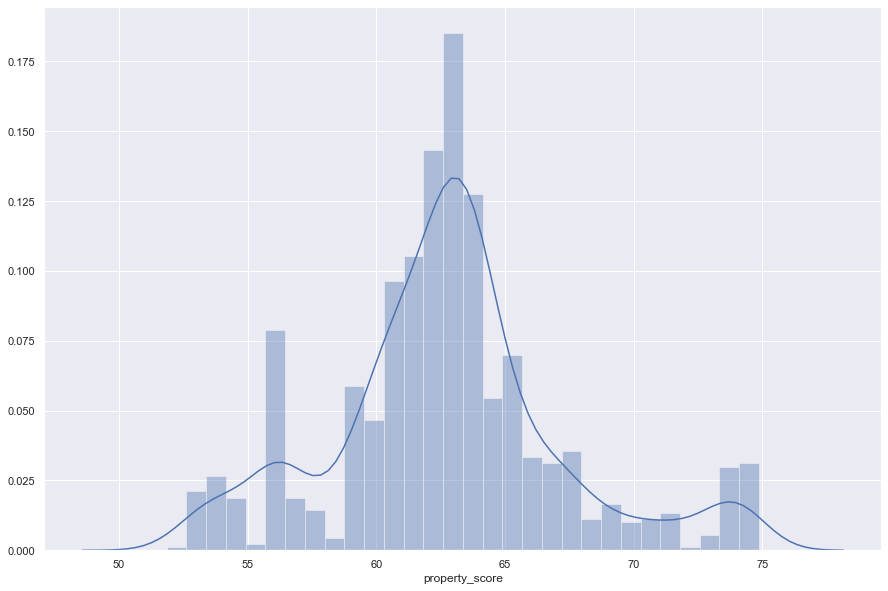

In [154]:
#sns.distplot(last['Property_price'],bins=100)
sns.distplot(last['property_score'])


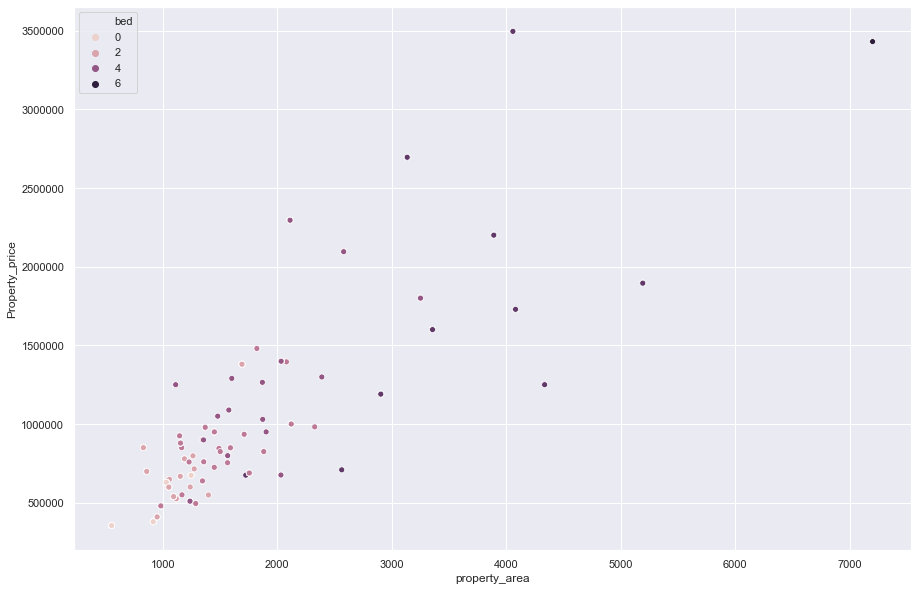

In [128]:
sns.scatterplot(eda_df['property_area'],eda_df['Property_price'],hue=eda_df['bed'])

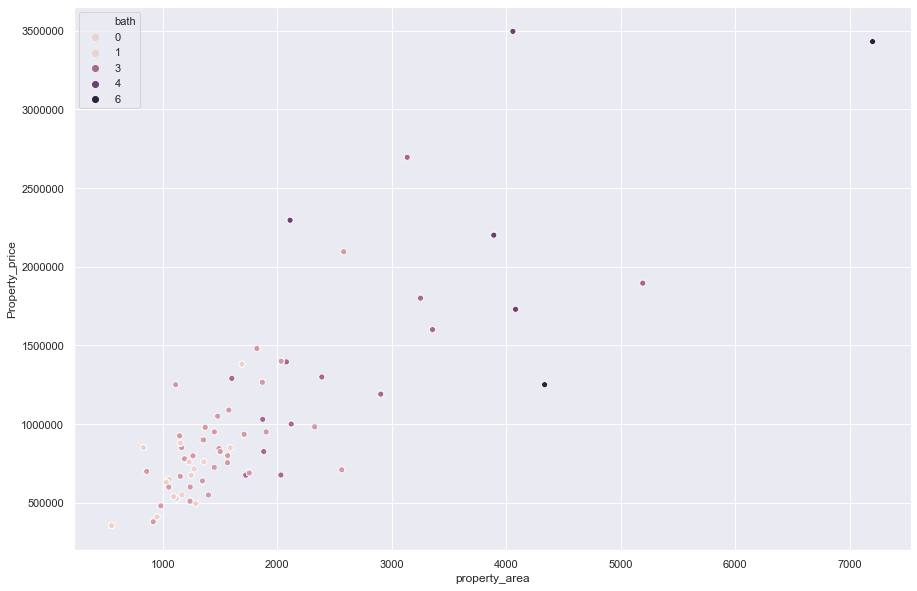

In [130]:
sns.scatterplot(eda_df['property_area'],eda_df['Property_price'],hue=eda_df['bath'])

In [77]:
sns.(last['Sewer'],last['Water'])

<Figure size 216x0 with 0 Axes>

In [20]:
ss = StandardScaler()
ss.fit_transform(eda_df)

array([[-0.96158624, -1.63200009, -0.98683647, -1.06351188],
       [-0.71417677,  0.9546907 , -0.06948453, -0.42599729],
       [-0.69005874, -0.76976983, -0.98683647, -0.53690991],
       ...,
       [-0.31630913,  0.09246044, -0.98683647, -0.4334536 ],
       [ 0.49188448,  0.9546907 , -0.06948453,  0.16305128],
       [ 0.21059477,  0.9546907 , -0.06948453, -0.11003611]])

In [21]:
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(eda_df, )
kmeans = pd.DataFrame(clust_labels)
eda_df.insert((eda_df.shape[1]),'kmeans',kmeans)

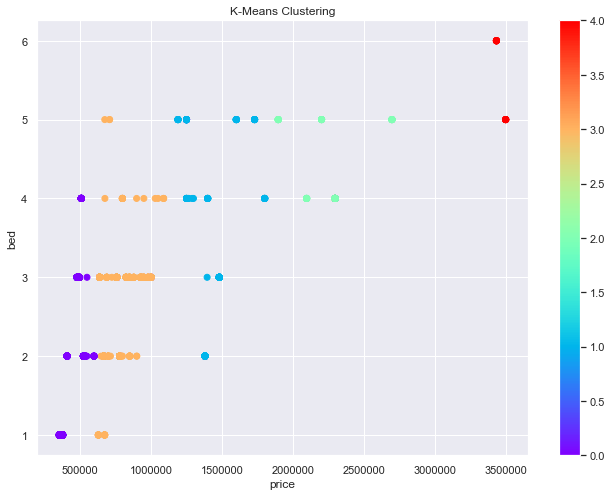

In [113]:

sns.set(rc={'figure.figsize':(11,8)})
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(eda_df['Property_price'],eda_df['bed'],
                     c=kmeans[0],cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('price')
ax.set_ylabel('bed')
plt.colorbar(scatter)

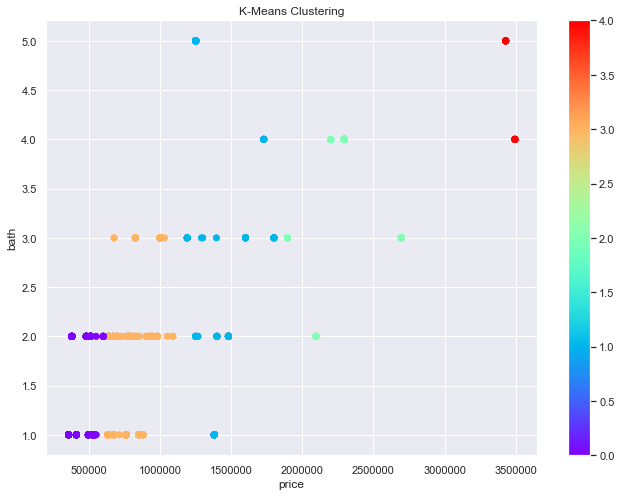

In [111]:

sns.set(rc={'figure.figsize':(11,8)})
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(eda_df['Property_price'],eda_df['bath'],
                     c=kmeans[0],cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('price')
ax.set_ylabel('bath')
plt.colorbar(scatter)

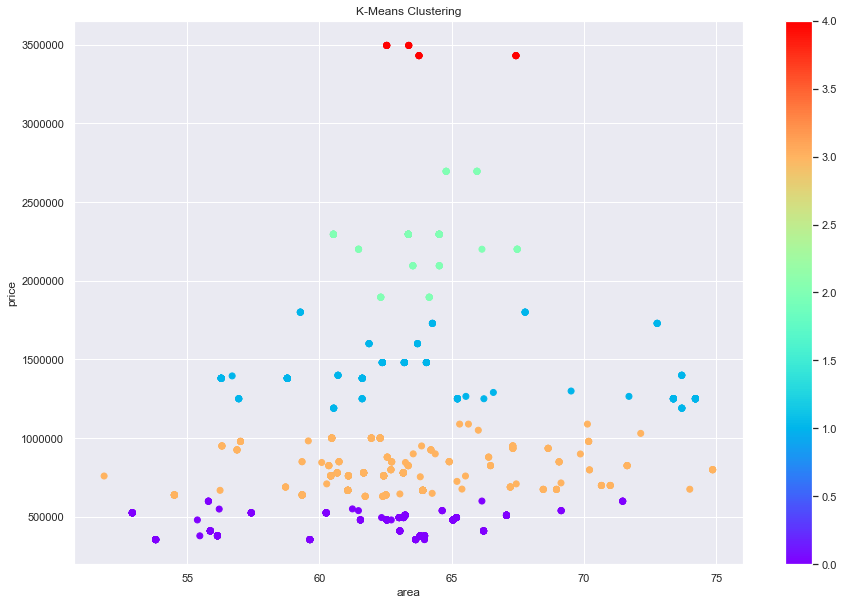

In [158]:

sns.set(rc={'figure.figsize':(15,10)})
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(last['property_score'],eda_df['Property_price'],
                     c=kmeans[0],cmap='rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('area')
ax.set_ylabel('price')
plt.colorbar(scatter)

In [108]:
lst = last['Property_price'].to_list()

compare=np.asanyarray(last[['Property_price','Condominium','Residential','Single_Family_Residence','Townhouse','bed','bath','year','property_area','Sewer','Water','HOA']])
count=0
v2=list(map(int, input("Enter values ").split())) 
cos_sim=[]
for v1 in compare:
    
    K = v2[0]
    closest_value=lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 

   
    if closest_value == v1[0] and count==0:
        print('Best match by value\n')
        print(v1)
        print(dot(v1, v2)/(norm(v1)*norm(v2)),'\n')
        #print(last[last['Property_price']==closest_value])
        
        count+=1
    
    if v2[1]==v1[1] and v2[3]==v1[3] and v2[3]==v1[3] and v2[4]==v1[4]:
        
        cos_sim.append(v1)
        (dot(v1, v2)/(norm(v1)*norm(v2)))
        
max=np.argmax(cos_sim)
#print(compare[max],'\n\n')
#cos_sim.sort()
#print(cos_sim[1:6],'\n',sep='\n')
#print(last['Property_price'])

Enter values 509900 0 0 1 0 4 2 1937 1239
Best match by value

[509900 0 0 1 0 4 2 1937 1239 '-1' '-1' 0]


ValueError: shapes (12,) and (9,) not aligned: 12 (dim 0) != 9 (dim 0)

In [110]:
v1

array([509900, 0, 0, 1, 0, 4, 2, 1937, 1239, '-1', '-1', 0], dtype=object)

In [174]:

      
# Driver code 
lst = last['Property_price'].to_list()
K = 1088888
lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 

1088888

In [238]:
cos_sim = dot(v1, v2)/(norm(v1)*norm(v2))

In [239]:
cos_sim

0.9656270520643789

In [147]:
#find the key of a column
search_key="Pool"
temp = list(info.items())  
res = [idx for idx, key in enumerate(temp) if key[0] == search_key]

In [148]:
res

[14]

In [71]:
key=input("wanna continue?")
while key!='':
    key=input("what to search?")
    if key=='type':
        type=input('what type?')
        typedf=df[df['property_type']=='type']
        print(typedf)
    
    elif key=='price':
        
        price=input('what range?')
        savedf=df[df['property_price']<='key']
        print(savedf)
    if key=='':
        break

wanna continue?yes
what to search?price
what range?600000
      Property_price            property_type property_price  \
0             355000              Condominium      $355,000    
1             799000                   Duplex      $799,000    
2              38888                     Land       $38,888    
3            1149000                   Duplex    $1,149,000    
4             509900  Single Family Residence      $509,900    
...              ...                      ...            ...   
2021         3495000  Single Family Residence    $3,495,000    
2022          689000                Townhouse      $689,000    
2023          759000  Single Family Residence      $759,000    
2024         1265000  Single Family Residence    $1,265,000    
2025         1088888                Townhouse    $1,088,888    

                              property_address  \
0     5840 Benner St #107 Los Angeles CA 90042   
1         10024 S Main St Los Angeles CA 90003   
2          3781 Richard

In [211]:
values=[]

In [212]:
for i in np.asarray(df['property_price'].values):
    a=i.strip(' ').strip('$').replace(',','')
    values.append([float(a.replace(' ',''))])

In [213]:
rescaled_values_min_max=scaler.fit_transform(values)
rescaled_values_standard=scaler2.fit_transform(values)

In [214]:
rescaled_values_min_max

array([[0.08187071],
       [0.19686349],
       [0.        ],
       ...,
       [0.18650378],
       [0.31755411],
       [0.27194238]])

In [133]:
a=[]
b=[]
for i,j in zip(rescaled_values_min_max,rescaled_values_standard):
    a.append(i[0])
    b.append(j[0])

In [145]:
b

[-0.8959061798811795,
 -0.20601536809488347,
 -1.3870835769428678,
 0.3378174790339534,
 -0.6552212998233028,
 -0.6317587969900301,
 -0.59306897443715,
 -0.23709153078795986,
 0.1063000669705343,
 -0.4095642337345339,
 0.6967471581389858,
 -0.43908658829295644,
 0.8521264177962331,
 2.118481601347231,
 -0.2666138853463824,
 -0.6783730410296447,
 0.5335973040003348,
 -0.7018355438629174,
 -1.3154343762377108,
 -0.32099717005926615,
 -0.32099717005926615,
 0.5724425073666802,
 -0.8586147846494878,
 -0.6006826342969537,
 1.116275354495517,
 1.461220760388665,
 -0.7638324884356048,
 -0.8104467324752194,
 -0.6713809044237025,
 -0.45540157370682155,
 0.4947365625526427,
 -0.8959061798811795,
 -0.20601536809488347,
 -1.3870835769428678,
 0.3378174790339534,
 -0.6552212998233028,
 -0.6317587969900301,
 -0.59306897443715,
 -0.23709153078795986,
 0.1063000669705343,
 -0.4095642337345339,
 0.6967471581389858,
 -0.43908658829295644,
 0.8521264177962331,
 2.118481601347231,
 -0.2666138853463824,
 -

In [141]:
 
# manually compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)#matrix of vector form
normb = np.linalg.norm(b)#matrix of vector form
cos = dot / (norma * normb)
 

In [139]:
# use library, operates on sets of vectors
cos_lib = cosine_similarity(rescaled_values_min_max, rescaled_values_standard)
 

In [140]:
print(
    dot,
    norma,
    normb,
    cos,
    cos_lib[0][0]
)

337.6989037186677 12.829173469672547 45.0111097397076 0.5848052365287137 -1.0


In [146]:
type(normb)

numpy.float64

In [117]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
 
# vectors
a = np.array([1,2,3])
b = np.array([1,1,4])
 
# manually compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)
 
# use library, operates on sets of vectors
aa = a.reshape(1,3)
ba = b.reshape(1,3)
cos_lib = cosine_similarity(aa, ba)
 
print(
    dot,
    norma,
    normb,
    cos,
    cos_lib[0][0]
)

15 3.7416573867739413 4.242640687119285 0.9449111825230682 0.9449111825230683


In [113]:
rescaled_values_standard

array([[-0.89590618],
       [-0.20601537],
       [-1.38708358],
       ...,
       [-0.26816769],
       [ 0.51805922],
       [ 0.24441496]])

In [125]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(values)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [142]:
print(pca.explained_variance_ratio_)

[1.]


In [143]:
print(pca.singular_values_)

[28968254.6614649]


In [13]:
df['property_type'].value_counts()

Single Family Residence    867
Duplex                     383
Condominium                253
Land                       230
Residential Income         175
Triplex                     53
Townhouse                   45
Residential                 10
Commercial Sale             10
Name: property_type, dtype: int64

In [67]:
value

array([ 355000.,  799000.,   38888., ...,  759000., 1265000., 1088888.])